<a href="https://colab.research.google.com/github/Sahil01S/Breast_cancer_classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(mlbench)
library(randomForest)
library(ggplot2)




Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




In [ ]:
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘foreach’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:

# Load dataset
data("BreastCancer")
df <- BreastCancer

# Check structure and summary of the dataset
str(df)
summary(df)

df <- df[, -1]



'data.frame':	699 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


      Id             Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 Length:699         1      :145   1      :384   1      :353   1      :407  
 Class :character   5      :130   10     : 67   2      : 59   2      : 58  
 Mode  :character   3      :108   3      : 52   10     : 58   3      : 58  
                    4      : 80   2      : 45   3      : 56   10     : 55  
                    10     : 69   4      : 40   4      : 44   4      : 33  
                    2      : 50   5      : 30   5      : 34   8      : 25  
                    (Other):117   (Other): 81   (Other): 95   (Other): 63  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :386   1      :402   2      :166   1      :443     1      :579  
 3      : 72   10     :132   3      :165   10     : 61     2      : 35  
 4      : 48   2      : 30   1      :152   3      : 44     3      : 33  
 1      : 47   5      : 30   7      : 73   2      : 36     10     : 14  
 6      : 41   3      : 28 

In [ ]:

# Convert factors to numeric for modeling
df$Cl.thickness <- as.numeric(as.character(df$Cl.thickness))
df$Cell.size <- as.numeric(as.character(df$Cell.size))
df$Cell.shape <- as.numeric(as.character(df$Cell.shape))
df$Marg.adhesion <- as.numeric(as.character(df$Marg.adhesion))
df$Epith.c.size <- as.numeric(as.character(df$Epith.c.size))
df$Bare.nuclei <- as.numeric(as.character(df$Bare.nuclei))
df$Bl.cromatin <- as.numeric(as.character(df$Bl.cromatin))
df$Normal.nucleoli <- as.numeric(as.character(df$Normal.nucleoli))
df$Mitoses <- as.numeric(as.character(df$Mitoses))



In [ ]:

# Convert Class variable to factor and encode as 1 and 2
df$Class <- factor(df$Class, levels = c("benign", "malignant"))

# Handling missing values (impute or remove)
df <- na.omit(df)



In [ ]:

# Split data into training and testing sets
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(df$Class, p = 0.7, list = FALSE)
trainData <- df[trainIndex, ]
testData <- df[-trainIndex, ]

# Train random forest model
rf_model <- randomForest(Class ~ ., data = trainData, ntree = 500)

# Print model summary
print(rf_model)



Call:
 randomForest(formula = Class ~ ., data = trainData, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.92%
Confusion matrix:
          benign malignant class.error
benign       303         8  0.02572347
malignant      6       162  0.03571429


In [ ]:
# Predictions on test data
predictions <- predict(rf_model, testData)

# Confusion matrix and accuracy
conf_matrix <- confusionMatrix(predictions, testData$Class)
print(conf_matrix)


Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       130         2
  malignant      3        69
                                         
               Accuracy : 0.9755         
                 95% CI : (0.9437, 0.992)
    No Information Rate : 0.652          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9462         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9774         
            Specificity : 0.9718         
         Pos Pred Value : 0.9848         
         Neg Pred Value : 0.9583         
             Prevalence : 0.6520         
         Detection Rate : 0.6373         
   Detection Prevalence : 0.6471         
      Balanced Accuracy : 0.9746         
                                         
       'Positive' Class : benign         
                   

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




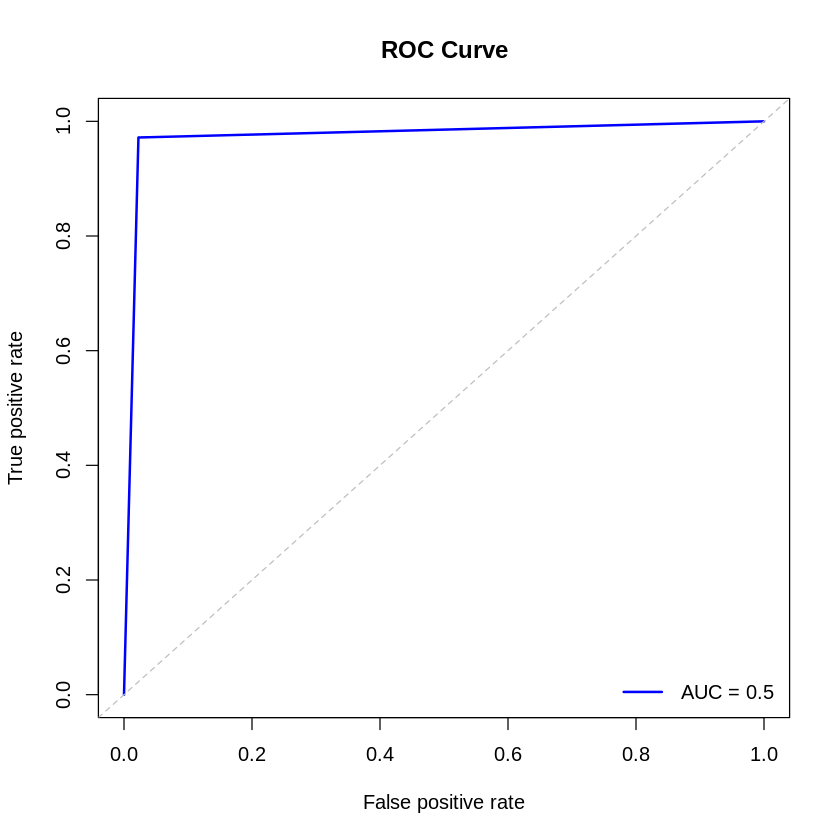

In [ ]:
install.packages("ROCR")

# Load required packages
library(ROCR)
library(ggplot2)  # If not already loaded

# Assuming 'predictions' and 'testData$Class' are already defined from your model
pred <- prediction(as.numeric(predictions), testData$Class)
perf <- performance(pred, "tpr", "fpr")



plot(perf, main = "ROC Curve", col = "blue", lwd = 2)

# Add diagonal reference line
abline(a = 0, b = 1, lty = 2, col = "gray")

# Add labels
legend("bottomright", legend = "AUC = 0.5", col = "blue", lty = 1, lwd = 2, bty = "n")



It is shgowing that the model performed pretty well.

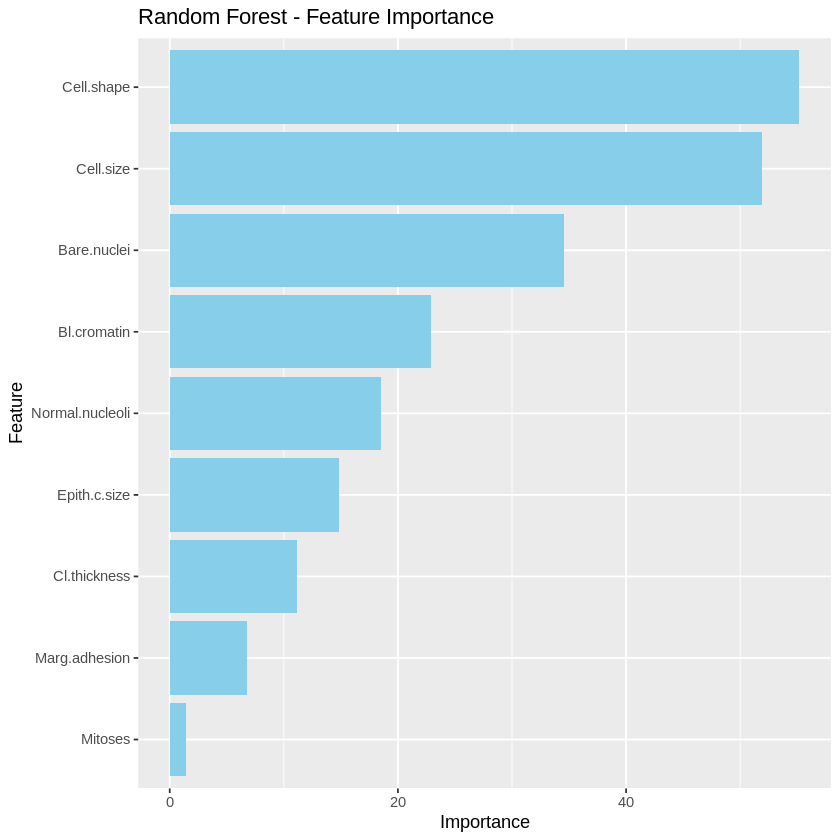

In [ ]:

# Extract feature importance
importance <- importance(rf_model)
var_importance <- data.frame(Feature = rownames(importance), Importance = importance[, 1])
var_importance <- var_importance[order(-var_importance$Importance), ]

# Plot feature importance
importance_plot <- ggplot(var_importance, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(title = "Random Forest - Feature Importance", x = "Feature", y = "Importance")
print(importance_plot)


Here we can see cell shape, cell size, bare nuclei is most imposrtant features.